# Obsah 
### Rozdelenie klasifikatorov a nejake priklady
### Metriky vyhodnocovania
### Hyperparameter tuning

# Minule sme si ukazali jednoduchy priklad pouzitia klasifikatora
Skusme si teraz vyskusat aj dalsie a porovnajme ich uspesnost

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 9, 6

In [3]:
from IPython.display import Image

In [4]:
# zoberiem si vopred vycistene data
iris_data = pd.read_csv('data/iris-data-clean.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

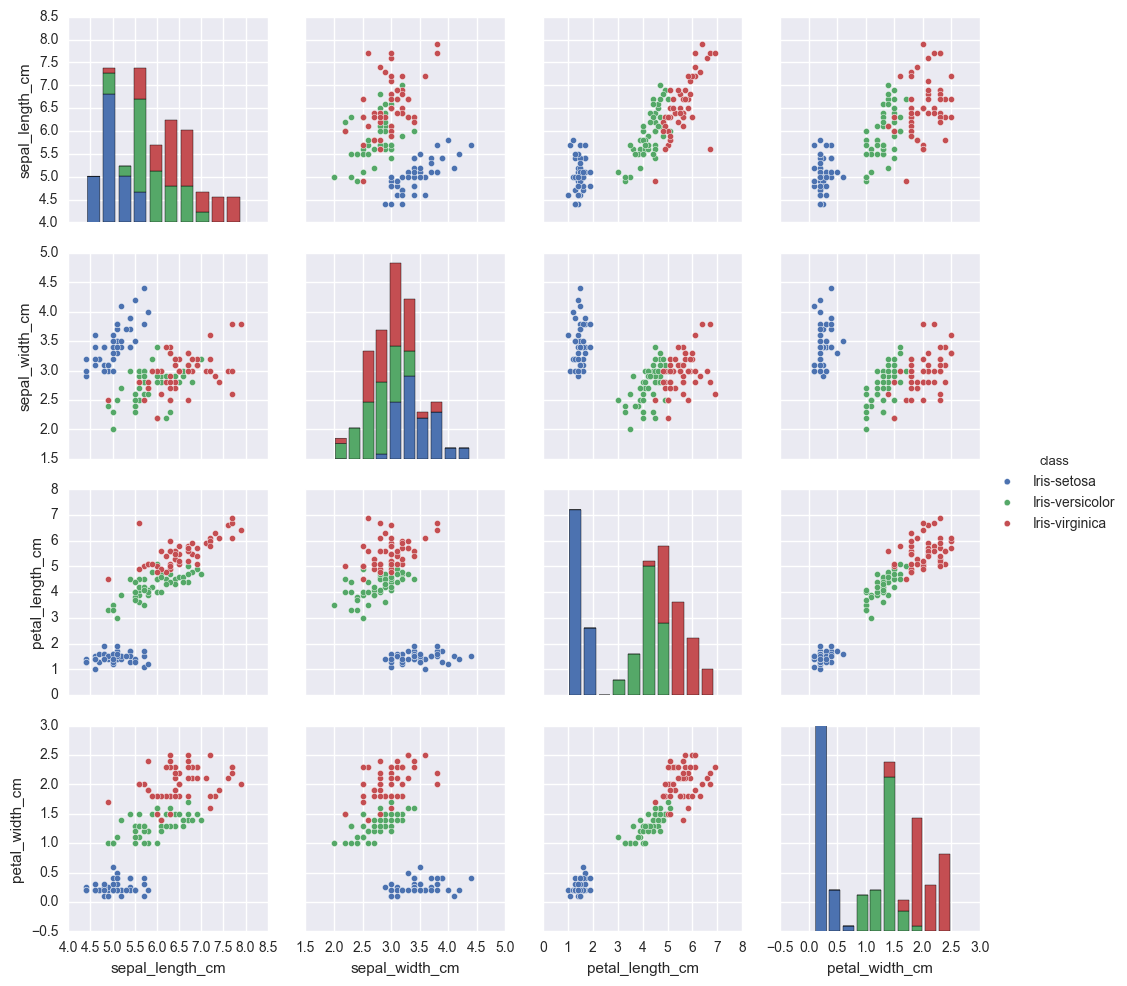

In [5]:
# sksuim mozno nejaky informativny obrazok vyrobit
seaborn.pairplot(iris_data, hue='class')

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [7]:
cross_validation_results = cross_val_score(clf, iris_data[iris_data.columns[iris_data.columns != 'class']], iris_data['class'], cv=10)

In [8]:
cross_validation_results # vysledky metriky accuracy v jednotlivych behoch

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [9]:
cross_validation_results.mean()

0.95999999999999996

Mieme spustit cross validaciu na nejakom klasifikatore, pozriet sa na jednotlive vysledky a spocitat ich agregovanu hodnotu.

Dnes by sme si mohli ukazat ake rozne klasifikatory vieme pouzivat a ako ich vyhodnocovat

Tu sa da najst pekny zoznam roznych klasifikatorov, ktore su pre nas pripravene priamo v kniznici.

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

## Rozdelenie klasifikatorov
inspirovane z tadialto: http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

a z tadialto: https://en.wikipedia.org/wiki/Statistical_classification

In [10]:
# toto nie je len rozdelenie klasifikatorov, ale aj dalsich algoritmov, ale pekne zoskupuje podobne algoritmy na zaklade principov, ktore vyuzivaju 
Image('img/MachineLearningAlgorithms.png')

Pre nas zaujimave rozdelenie klasifikatorov moze vyzerat napriklad takto.

### Instance based
* porovnavajuce jednotlive pozorovania na zaklade nejakej podobnosti
* kNN

### Decision Tree
* rozdelovanie priestoru na zaklade hodnoty atributu a funkcie maximalizujucej rozdielnost roznych vetiev
* C4.5
* ID3
* ...

### Ensamble
* spajanie viacerych modelov dohromady a vyuzivajuce to, ze niektore modely mozu byt lepsie na rozne problemy a vedia sa spajat napriklad hlasovanim alebo kaskadou
* Random forest

### Bayesian
* algoritmy vyzuivajuce bayesovske prvidlo na pocitanie podmienenych pravdepdoobnosti
* Naive Bayes
* Multinomial Naive Bayes
* Gausian Naive Bayes

### Linear 
* Algoritmy rozdelujuce priestor hodnot nejakou rovinou.
* Logistic regression
* SVM
* Perceptron

Kazda z tychto skupin algoritmov sa dobre hodi na rozne data a prave vdaka explorativnej analyze by ste mali byt schopny pomerne rychlo uhadnut, ktora skupina je najlepsia.

# Motivacia pre vyhodnocovanie klasifikatorov

Existuje sptrane vela pristupov a typov klasifikatorov. ** Ktory z nich je najlepsi? **

Rozne klasifikatory maju rozne parametre. ** Ako nastavit klasifikator tak, aby daval najlepsie vysledky? ** 

# Metriky vyhodnocovania

Existuje strasne vela roznych metrik na vyhodnocovanie klasifikacie. Vela z nich je uz predpriprvenych v SciKit kniznici (spolu s metrikami na vyhodnocovanie naprikld regresie ...).

http://scikit-learn.org/stable/modules/model_evaluation.html

Zopar z nich si dnes prejdeme

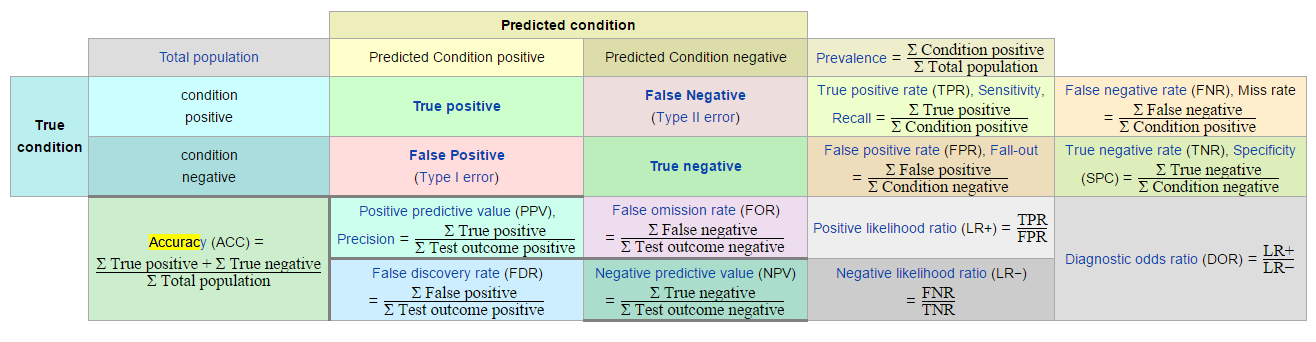

In [11]:
Image('img/metrics.png')

### Dva mody vyhodnocovania

* train/test (validation)
* cross validacia

### train/test

In [12]:
from sklearn.model_selection import train_test_split

# rozdelime si data na trenovaciu a testovaciu vzorku
data, target = iris_data[iris_data.columns[iris_data.columns != 'class']], iris_data['class']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0) 

In [13]:
from sklearn.neighbors import KNeighborsClassifier # zoberieme si nejaky klasifikator. Napriklad KNN

Vieme, ze KNN, vyuziva nejaku mieru podobnosti medzi pozorovaniami na to, aby nasiel zopar, ktore su k nemu najblyzsie. Napriklad 3. Potom predikcia je rovnaka ako majoritna trieda medzi tymito najblyzsimi pozorovaniami. 

Kedze sa tam pouziva nejaka metrika podobnosti, tak klasifikatoru by mohlo vadit, ak su jednotlive atrivuty na roznych skalach

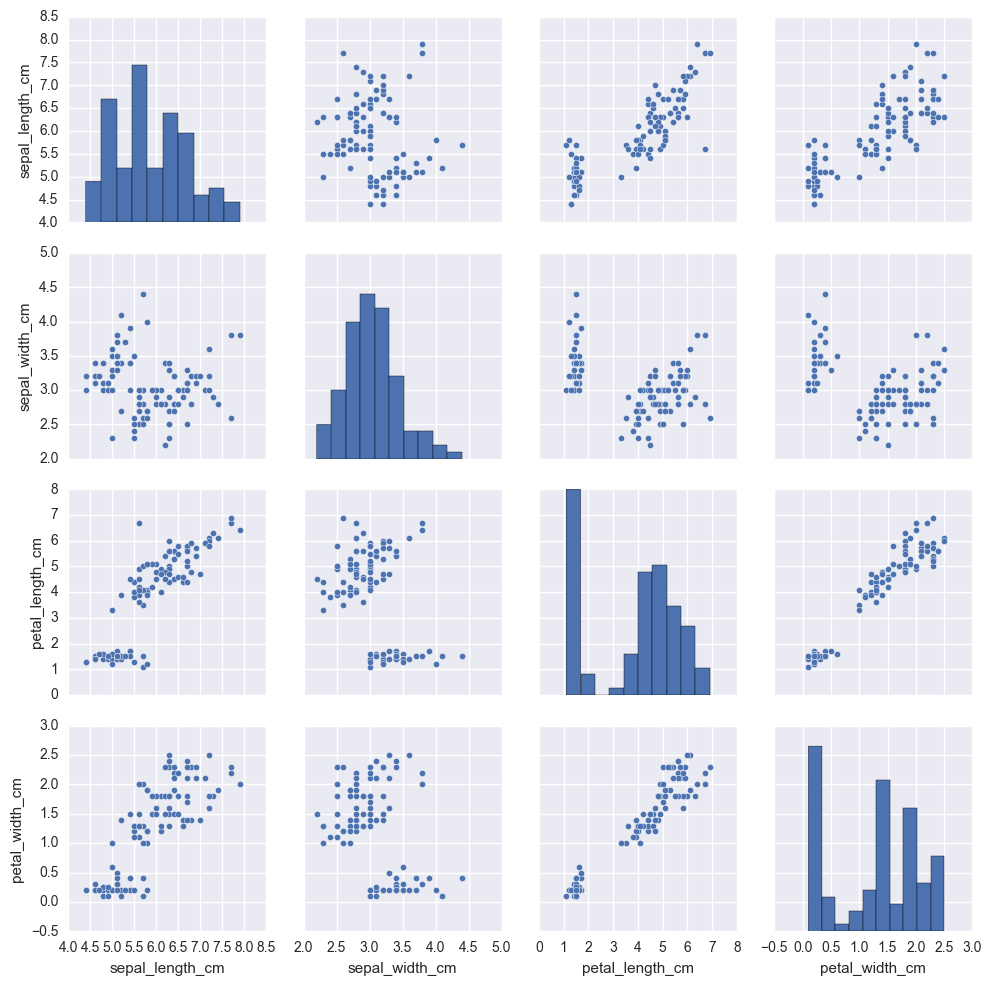

In [14]:
seaborn.pairplot(X_train)

Tu to este nie je taky velky problem, ale pre istsou tie data predsalen naskalujeme na spolocny stred a rozptyl

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

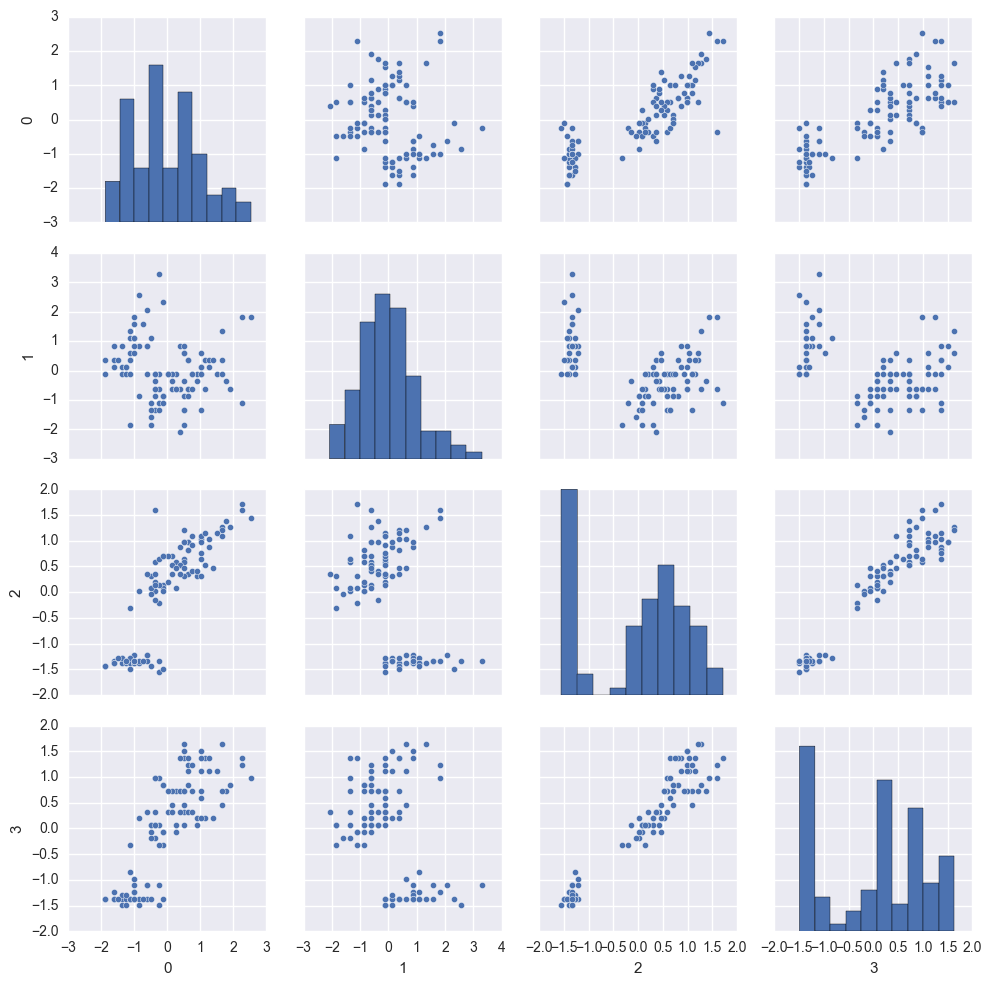

In [16]:
seaborn.pairplot(pd.DataFrame(X_train_std))

teraz zu vsetky data rozplesknute okolo rovnakej hodnoty a priblyzne rovnako daleko, takze aj metrika podobnosti bude brat rozne atributy s rovnakou vahou.

In [17]:
knn = KNeighborsClassifier(3)

In [18]:
# konecne si natrenujeme klasifikatorom a spravime predikciu na datach, ktore este nevidel
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

In [19]:
# Ako to teraz vyhodnotit? Mozeme sa napriklad pozriet na to, kolko pozorovani sa mi nepodarilo klasifikovat spravne.
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 5


Co nam toto cislo povedalo? 
Silno to zavisi od poctu pozorovani. Asi by sme sa mali pozriet aj na to.

In [20]:
# Castejsie sa vsak pouzivaju metriky, ktore do jedneho cisla schovaju aj uspesnost a aj pocet pozorovani. Napriklad Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


$$accuracy = \frac{TP + TN}{ALL}$$

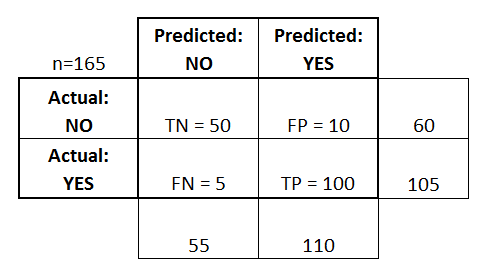

In [21]:
Image('img/confusion_matrix2.png')

# Cross validacia

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)

In [23]:
sc = StandardScaler()
sc.fit(data)
data_scaled = sc.transform(data)

In [24]:
knn_results = cross_val_score(knn, data_scaled, target, cv=10)
# knn_results = cross_val_score(knn, data_scaled, target, cv=10, scoring='accuracy')
knn_results

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.86666667,
        1.        ,  0.86666667,  1.        ,  1.        ,  1.        ])

In [25]:
knn_results.mean()

0.95999999999999996

Nie vsetky metriky ale davaju len jedno cislo (napriklad f1 alebo precission)

hlavne v pripade clasifikacie do viacerych tried

Na to aby sme ziskali jedno cislo, tak musime pouzit nejaku schemu na priemerovanie medzi triedami

Existuje viacero roznych sposobov priemerovania a tieto maju trochu odlysne vlastnosti

http://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel

# Porovnanie viacerych klasifikatorov

Ako by mohlo vyzerat zakladne porovnanie niekolkych klasifikatorov?

In [38]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

num_folds = 10
num_instances = len(X)
seed = 7

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Mozeme tie data trochu zasumiet, nech to nevychadza az tak pekne pre vsetky klasifikatory

In [ ]:
n_samples, n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 20 * n_features)]

# Priklad pre Precision a Recall

presnost a pokrytie. Trochu iny vyznam ako accuracy. Niekedy nas zaujima len jedno z toho. Ich hodnota je previazana a my mozno chceme nejaku rovnovahu medzi nimi.

In [ ]:
Image('img/confusion_matrix2.png')

$$precision = \frac{TP}{TP + FP}$$

$$recall = \frac{TP}{TP + FN}$$

In [ ]:
Image('img/multi-class-confusionmatrix.png')

$$ precision A = \frac{TP_A}{TP_A+FP_A} $$
$$ = \frac{TP_A}{Total predicted as A} $$
$$ = \frac{TP_A}{TotalPredicted_A} $$
$$ = \frac{30}{60} $$
$$ = 0.5 $$

recall sa pocita obdobne

To znamena, ze pre kazdu triedu si vieme spocitat samostatnu presnost. Ako z toho vyrobime jedno cislo?

http://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel

https://en.wikipedia.org/wiki/Precision_and_recall

Ked chceme udrzat nejaku rovnovahu medzi presnostou a pokrytim, tak sa pouziva $F_1$ ($F_{0.5}, F_{2}$)

In [ ]:
# Existuje ich este vela dalsich a pouzivaju sa rozne vtedy, ak vas viac trapi nejaky prolem v datach.
# Tato tabulka z wikipedie moze celkom pomoct pri rozhodovani ktoru pouzit

Image('img/metrics.png')

# Limitacie Accuracy
Nevyvazene data

Multinomial classification (klasifikacia do viacerych tried)

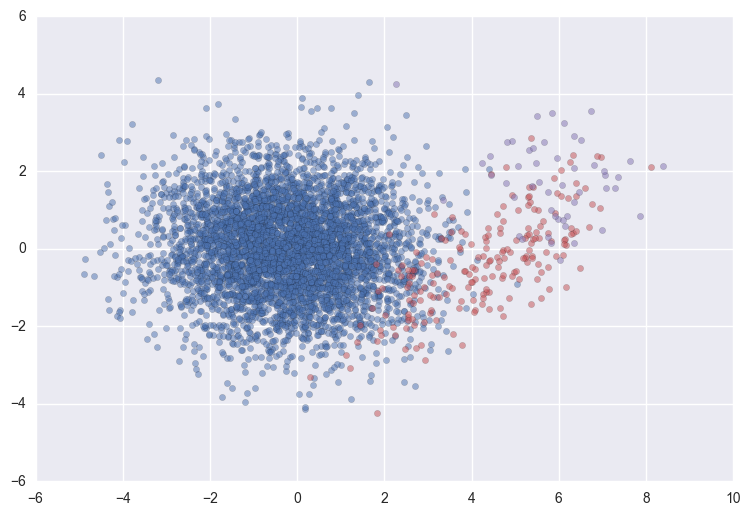

In [26]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=3, class_sep=1, weights=[0.95, 0.04, 0.01],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
knn = KNeighborsClassifier(3)

In [29]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
y_pred = knn.predict(X_test_std)

In [32]:
accuracy_score(y_test, y_pred)

0.97066666666666668

je tento klasifikator dobry? 

co ked mna viac zaujimaju prave tie triedy, ktore su v mensine? 

tato metrika berie triedy s rovnakou vahou a je pre nu vyhodne jednoducho oznacit vsetko ako jednu triedu.

Priklad s platiacimi zakaznikmi pri citani novin

In [33]:
accuracy_score(y_test, np.zeros(len(y_pred)))

0.94933333333333336

Tento jednoduchy model ma okolo 95% uspesnost (accuracy), ale v skutocnosti nespravil vobec nic.

Mozno by to chcelo sa pozriet na tie predikcie aj trochu inak.

http://scikit-learn.org/stable/modules/classes.html#classification-metrics

In [34]:
from sklearn import metrics

In [35]:
metrics.confusion_matrix(y_test, y_pred)

array([[1424,    0,    0],
       [  36,   26,    1],
       [   5,    2,    6]])

In [36]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1424
          1       0.93      0.41      0.57        63
          2       0.86      0.46      0.60        13

avg / total       0.97      0.97      0.97      1500



https://en.wikipedia.org/wiki/Precision_and_recall

# Logarithmic loss (Logloss)
Ak mame algoritmus, ktory predikuje pravdepodobnost toho, ze nejake pozorovanie patri do triedy, tak vieme penalizovat model proporcne k tomu, ako si je isty svojou predikciou

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
results = cross_validation.cross_val_score(model, data_scaled, target, cv=10, scoring='neg_log_loss')

In [40]:
(results.mean(), results.std()) # cim mensia hodnota, tym lepsie

(-0.34292792057637872, 0.061478671229665396)

Penalizacia za nespravne zaradenie do triedy zavisi od toho, ako velmi sme si isty, ze to tam patri. 

$$log loss = -\frac{1}{N}\sum_{i=1}^N {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$$


In [41]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll


V extremnom pripade by sa mohlo stat, ze povieme, ze je to na 100% nieco a je to nieco ine. Vtedy by sa stalo, ze suma logaritnickych penalizacii by bola nekonecna. To by sposobilo, ze jedno pozorovanie mi rozhodi cely experiment. Aby sa to nestalo, je tam maly epsilon, ktory reguluje tieto extremne hodnoty.

# Area Under ROC Curve (AUC)

True positive rate (Sensitivity) a False positive rate (Specificity) su navzajom prepojene. 
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Ak nastavujeme hranicnu pravdepodobnsot na zaradenie pozorovania do jednej triedy v prospech k jendej hodnote, tak ta druha sa meni s nou. Receiver Operating Characteristic (ROC) hovori, ako navzajom sivisia. Chceme, aby tato hodnota bola co najvyssia,

In [42]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [43]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2] # klasicka ROC kryvka sa pouziva len na binarnu klasifikaciu, budeme teda klasifikovat len jednu triedu
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

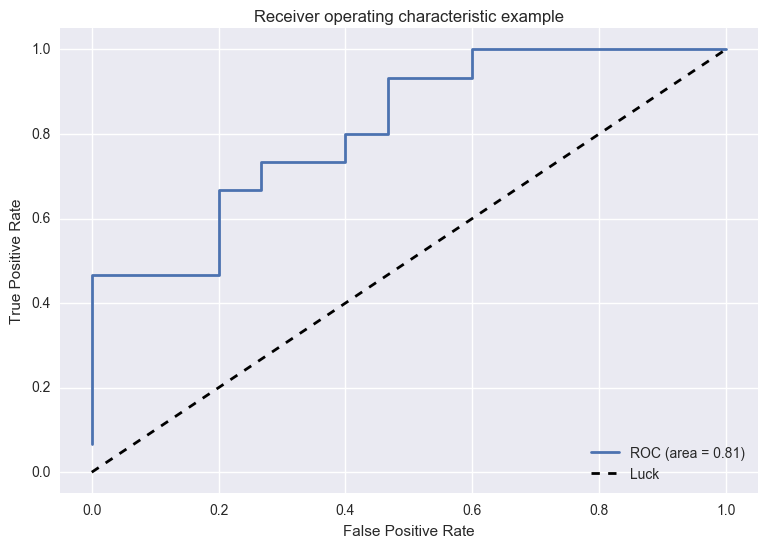

In [44]:
# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
# ak nechcem obrazok, tak zapis je takmer rovnaky ako keby som pouzival logloss alebo nieco ine
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test)
metrics.roc_auc_score(y_test, probabilities[:, 1])

0.81333333333333335

Ak chceme upravit ROC pre cross validaciu, tak si mozeme vykreslit krivky pre kazdy fold ako aj priemernu kryvku

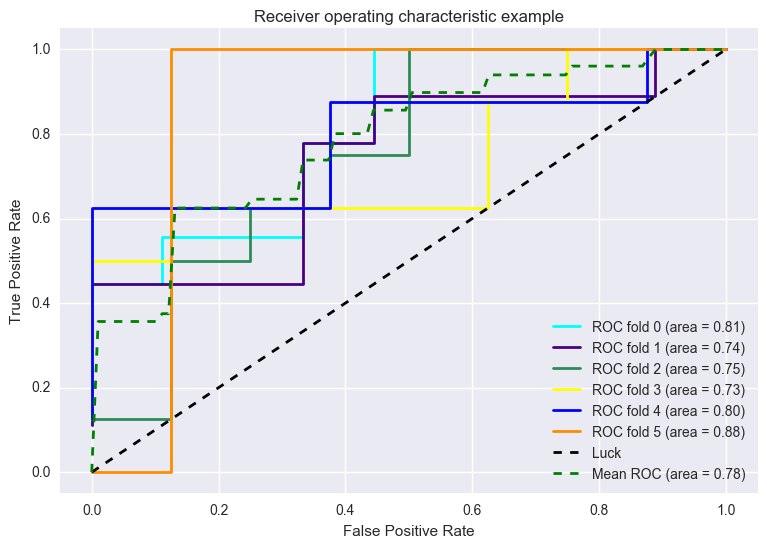

In [46]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [47]:
# podobneaj pri cross validacii, ak ma nezaujimaju obrazky, tak je zapis jednoduchy
roc_auc_scores = cross_validation.cross_val_score(model, X, y, cv=6, scoring='roc_auc')
(roc_auc_scores.mean(), roc_auc_scores.std())

(0.7157921810699589, 0.083100414980961185)

Podobne sa to da pouzit aj na ROC na viacerych triedach aj ked to priamo na takyto pripad nie je urcene

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [49]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
transformed_target = lb.fit_transform(y)
# transformed_target[:,1]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, transformed_target, test_size=0.3, random_state=0)

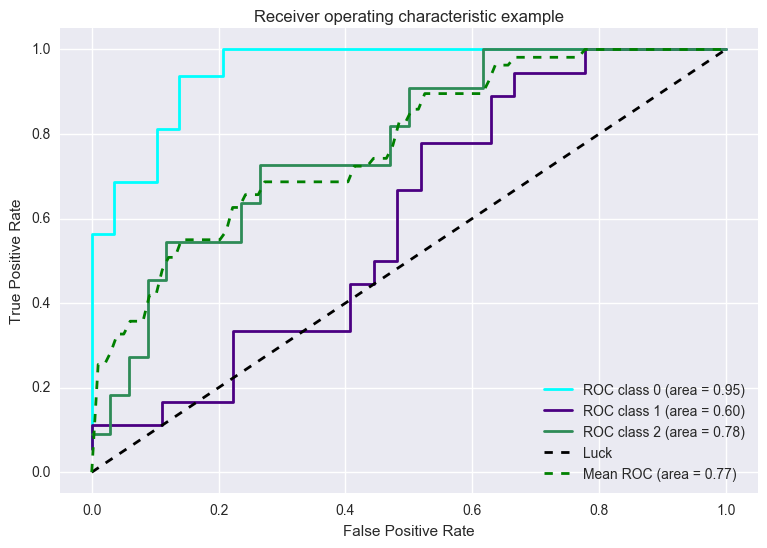

In [51]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.preprocessing import LabelBinarizer

# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

lb = LabelBinarizer()
transformed_target = lb.fit_transform(iris.target)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

for class_index, color in zip(range(len(lb.classes_)), colors):
    (train, test)
    probabilities = classifier.fit(X_train, y_train[:,class_index]).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test[:,class_index], probabilities[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC class %s (area = %0.2f)' % (lb.classes_[class_index], roc_auc))
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

mean_tpr /= len(lb.classes_)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Koho by zaujimali dalsie podrobnosti o vyhodnocovani klasifikatorov a statisticke testy, tak perfektna prezentacia je tu:
http://www.icmla-conference.org/icmla10/CFP_Tutorial_files/jose.pdf

Podrobnejsie o ROC: http://cmp.felk.cvut.cz/~hlavac/TeachPresEn/31PattRecog/13ClassifierPerformance.pdf

Statisticky test na overenie, ci je rozdiel medzi dvoma klasifikatormi signifikantny

Dietterich, Thomas G. "Approximate statistical tests for comparing supervised classification learning algorithms." Neural computation 10.7 (1998): 1895-1923.

# Hyperparameter tuning

Rozne klasifikatory maju rozne parametre, ktore mozeme nastavovat a tak zlepsovat ich uspesnost na konkretnom datasete. Tieto sa volaju Hyperparametre.

Na to aby sme ich dobre nastavili musime poznat dataset a musime vediet ako algoritmus funguje.

In [52]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`k_neighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [c

In [ ]:
help(DecisionTreeClassifier)

Dalsia moznost, ktora nevyzaduje velku domenovu znalost je skusat rozne kombinacie parametrov.

To mozeme robit hrubou silou alebo nejakou optimalizacnou strategiou.

# GridSearch

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [54]:
from sklearn.grid_search import GridSearchCV
clf = DecisionTreeClassifier

cv_params = {'max_depth': [1,2,3,4] + list(range(5,10,2)), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3] }
ind_params = {'random_state': 0}
optimization = GridSearchCV(clf(**ind_params), 
                            cv_params, 
                             scoring = 'f1_macro', cv = 5, n_jobs = -1, verbose=True) 

/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [55]:
iris.data.shape # to znamena, ze hlbka stromu 4 by mala stacit. Uvidime co to spravi

(150, 4)

In [56]:
X.shape # uvidime, aky vplyv na vykon podla hlbky stromu bude mat ten sum 

(150, 804)

In [57]:
# Niez to spustime, tak si skusme najskor pozriet, ake vsetky kombinacie to bude skusat
from sklearn.grid_search import ParameterGrid
list(ParameterGrid(cv_params))

[{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_sampl

In [58]:
%%time
optimization.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kovko/utility/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 1.05 s, sys: 184 ms, total: 1.24 s
Wall time: 4.73 s


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 9], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_macro',
       verbose=True)

In [59]:
optimization.grid_scores_

[mean: 0.55556, std: 0.00000, params: {'max_depth': 1, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.55556, std: 0.00000, params: {'max_depth': 1, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.90537, std: 0.07619, params: {'max_depth': 3, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.91145, std: 0.06483, params: {'max_depth': 3, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.89286, std: 0.07450, params: {'max_depth': 4, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.90466, std: 0.06032, params: {'max_depth': 4, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.89286, std: 0.07450, params: {'max_depth': 5, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.90466, std: 0.06032, params: {'max_depth': 5, 'criterion': 'gini', 'min_samples_leaf': 3},


In [60]:
sorted(optimization.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_leaf': 1},
 mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'entropy', 'min_samples_leaf': 1},
 mean: 0.93327, std: 0.04716, params: {'max_depth': 2, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.91145, std: 0.06483, params: {'max_depth': 3, 'criterion': 'gini', 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'max_depth': 5, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'max_depth': 7, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.91138, std: 0.06126, params: {'max_depth': 9, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.90647, std: 0.07443, params: {'max_depth': 4, 'criterion': 'entropy', 'mi

In [61]:
list(filter(lambda x: 'best' in x, dir(optimization)))

['best_estimator_', 'best_params_', 'best_score_']

In [62]:
optimization.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

# Velky pozor na pretrenovanie.

Zmysel validacnej vzorky. Prikald sutaze NetCla

# Co ked mame parameter, ktory je realne cislo, a nevieme kde presne sa mame pohybovat pri hladani najlepsej hodnoty?

# Co ked je priestor moznych hodnot prilis velky a nechceme ho prechadzat cely?

dali by sa pouzit nejake ine optimalizacne strategie.

In [63]:
from scipy.optimize import basinhopping
# from scipy.optimize import anneal # je deprecated
# nieco podobne ako Simulated annealing, ale trochu lepsie

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.anneal.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.basinhopping.html

https://en.wikipedia.org/wiki/Simulated_annealing

Pozor, tieto optimalizacie nezarucuju, ze sa najde globalne maximum. Hrozi, ze uviaznu v lokalnom maxime a nedostanu sa do tej casti priestoru, kde je optimalne riesenie. Maju ale postupy ako sancu tohoto stavu znizit.

# Len drobna ukazka

In [64]:
import math
fct = lambda x: math.cos(x[0]) + math.sin(x[1])

In [ ]:
ret = basinhopping(fct, [0.5, 0.5], niter=200, disp=True, stepsize=0.1, T=0.05)

In [ ]:
ret

Nemame take pekne rozhranie na pouzivanie ako je GridSearch a len malo optimalizacnych strategii je priamo imlementovanych v SciPy. Ak by to teda niekto chcel pouzivat, tak musi vyriesit zopar implementacnych problemov.

Ak chcete, tak vam mozem ukazat priklad, kde som toto pouzival na spajanie viacerych klasifikatorov vahovanim. Konkretne na najdenie optimalnych vah.